<a href="https://colab.research.google.com/github/TSAOTUNG/DM2023-Lab2/blob/main/DM2023_Lab2_Homework_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Student Information
Name: 曹心瞳

Student ID: 109020022

GitHub ID: TSAOTUNG

Kaggle name: emma

Kaggle private scoreboard snapshot:


In [2]:
from google.colab.patches import cv2_imshow, cv2
img1 = cv2.imread('/content/drive/MyDrive/截圖 2023-12-28 上午12.06.18.png')
img2 = cv2.imread('/content/drive/MyDrive/截圖 2023-12-28 上午12.06.52.png')

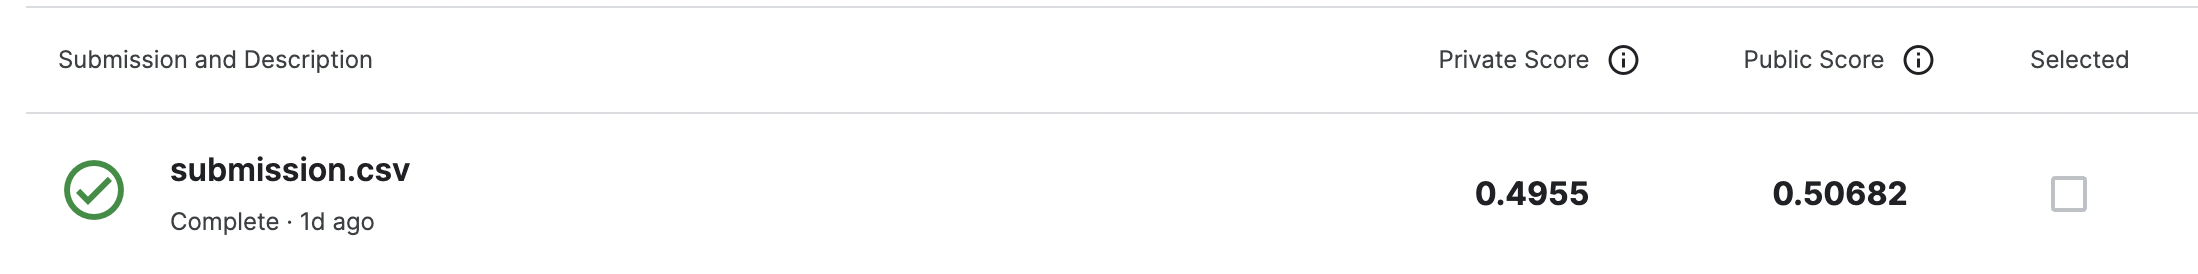

In [3]:
cv2_imshow(img1)

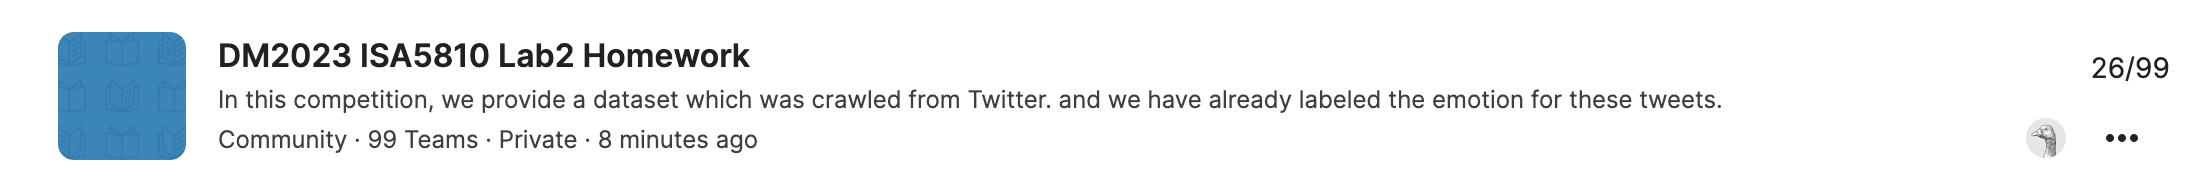

In [4]:
cv2_imshow(img2)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

## Import packages

In [ ]:
import pandas as pd
import numpy as np
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger
import gensim
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings('ignore')
import re
import itertools

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## First

#### Read data

In [ ]:
# Training data
anger_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

# Shuffle
train_df = train_df.sample(frac=1)

In [ ]:
# Testing data
anger_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# Shuffle
test_df = test_df.sample(frac=1)

#### Exercise 1

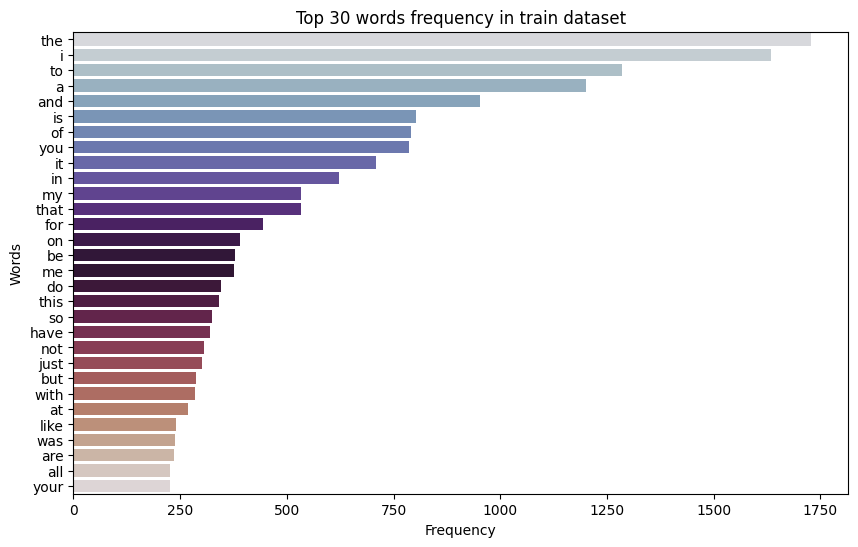

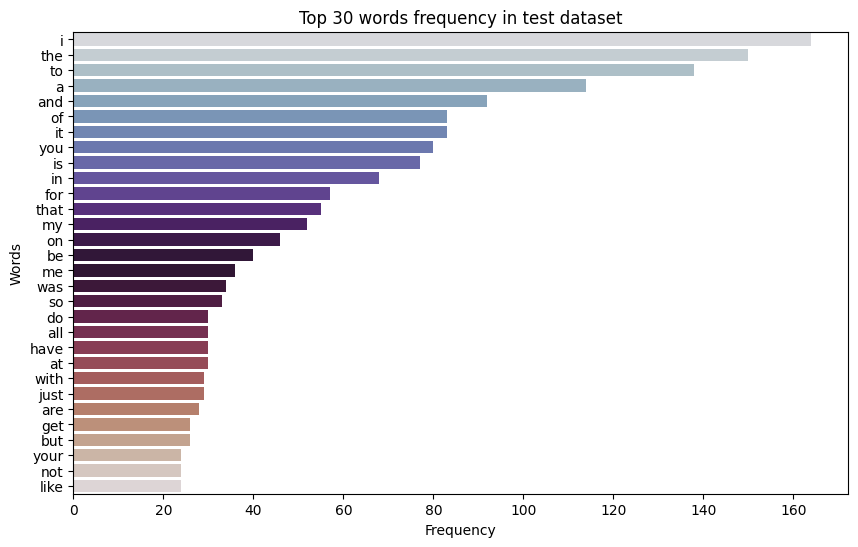

In [ ]:
def plot_word_frequency(df, title):
    # Text -> single string
    text = ' '.join(df['text'].values.tolist())

    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens = [i.lower() for i in tokens if i.isalpha()]

    # Word frequency
    word_freq = Counter(tokens)

    # Get the top 30
    top_words = word_freq.most_common(30)

    # Plot word frequency
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[1] for word in top_words], y=[word[0] for word in top_words], palette='twilight')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top 30 words frequency in {title} dataset')
    plt.show()

# Plot word frequency for train dataset
plot_word_frequency(train_df, 'train')

# Plot word frequency for test dataset
plot_word_frequency(test_df, 'test')

#### Exercise 2

In [ ]:
# Build analyzers(TF-IDF)
tfidf = TfidfVectorizer(max_features=1000)

# Apply analyzer to training data
tfidf.fit(train_df['text'])
train_tfidf = tfidf.transform(train_df['text'])

# Observe some feature names
feature_names_tfidf = tfidf.get_feature_names_out()
feature_names_tfidf[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

#### Exercise 3

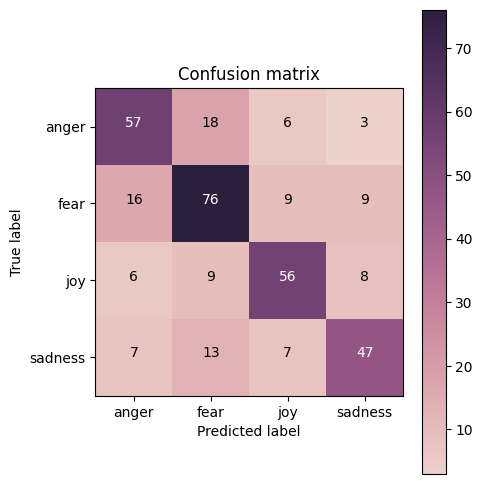

In [ ]:
# Analyzers
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
BOW_500.fit(train_df['text'])

# Training & Testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# Build Decision Tree model
DT_model = DecisionTreeClassifier(random_state=1)

# Train
DT_model = DT_model.fit(X_train, y_train)

# Predict
y_train_dt_pred = DT_model.predict(X_train)
y_test_dt_pred = DT_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_dt_pred)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

The x-axis represents the predicted categories, while the y-axis represents the actual categories. The diagonal elements represent the number of samples correctly predicted by the model, whereas off-diagonal elements represent the model's incorrect predictions.

For example, the '57' in the top-left corner represents instances where both the actual and predicted categories are 'anger' (correct prediction), while the '3' in the top-right corner represents instances where the actual category is 'anger' but the predicted category is 'sadness' (incorrect prediction).

#### Exercise 4

In [ ]:
# Model
NB_model = MultinomialNB()

# Train
NB_model = NB_model.fit(X_train, y_train)

# Predict
y_train_nb_pred = NB_model.predict(X_train)
y_test_nb_pred = NB_model.predict(X_test)

# Testing result
y_test_nb_pred

array(['fear', 'joy', 'fear', 'fear', 'fear', 'anger', 'sadness', 'fear',
       'fear', 'anger', 'sadness', 'anger', 'anger', 'anger', 'anger',
       'fear', 'joy', 'anger', 'fear', 'joy', 'sadness', 'sadness', 'joy',
       'sadness', 'sadness', 'sadness', 'sadness', 'anger', 'fear',
       'anger', 'anger', 'sadness', 'joy', 'sadness', 'anger', 'fear',
       'fear', 'joy', 'joy', 'fear', 'sadness', 'fear', 'fear', 'fear',
       'fear', 'fear', 'anger', 'anger', 'sadness', 'fear', 'sadness',
       'anger', 'anger', 'fear', 'anger', 'fear', 'fear', 'joy', 'fear',
       'sadness', 'anger', 'fear', 'sadness', 'fear', 'fear', 'sadness',
       'fear', 'joy', 'anger', 'fear', 'fear', 'anger', 'fear', 'anger',
       'anger', 'fear', 'fear', 'sadness', 'sadness', 'fear', 'fear',
       'fear', 'anger', 'anger', 'sadness', 'joy', 'anger', 'fear',
       'anger', 'joy', 'sadness', 'anger', 'sadness', 'anger', 'fear',
       'sadness', 'joy', 'anger', 'joy', 'joy', 'fear', 'anger',
     

#### Exercise 5

Decision Tree model

In [ ]:
# Accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_dt_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_dt_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
# Precision, Recall, F1-score,
print(classification_report(y_true=y_test, y_pred=y_test_dt_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



Naive Bayes model

In [ ]:
# Accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_nb_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_nb_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [ ]:
# Precision, Recall, F1-score,
print(classification_report(y_true=y_test, y_pred=y_test_nb_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



Comparing the results of these two models, I observe that the Decision Tree model exhibits signs of overfitting. The Decision Tree model is more sensitive to the changes in the data, resulting in poorer generalization ability. Conversely, the Naive Bayes model, due to its simplicity, tends to generalize better with a lower tendency toward overfitting.

#### Exercise 6

In [ ]:
# Deal with label (string -> one-hot)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

In [ ]:
# I/O check
input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

In [ ]:
# Input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# Output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# Model
model = Model(inputs=[model_input], outputs=[model_output])

# Loss function & Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [ ]:
csv_logger = CSVLogger('/content/drive/MyDrive/DM2023-Lab2-Master/logs/training_log.csv')

# Training setting
epochs = 25
batch_size = 32

# Train
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger], validation_data = (X_test, y_test))
print('Training finish')

Epoch 1/25
113/113 [==============================] - 11s 76ms/step - loss: 1.3318 - accuracy: 0.3725 - val_loss: 1.2813 - val_accuracy: 0.4524
Epoch 2/25
113/113 [==============================] - 2s 13ms/step - loss: 1.0146 - accuracy: 0.6443 - val_loss: 0.9412 - val_accuracy: 0.6427
Epoch 3/25
113/113 [==============================] - 1s 7ms/step - loss: 0.6061 - accuracy: 0.7861 - val_loss: 0.8104 - val_accuracy: 0.7003
Epoch 4/25
113/113 [==============================] - 1s 11ms/step - loss: 0.4242 - accuracy: 0.8395 - val_loss: 0.7820 - val_accuracy: 0.6916
Epoch 5/25
113/113 [==============================] - 1s 5ms/step - loss: 0.3385 - accuracy: 0.8785 - val_loss: 0.8426 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 1s 6ms/step - loss: 0.2803 - accuracy: 0.9012 - val_loss: 0.8969 - val_accuracy: 0.6744
Epoch 7/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2320 - accuracy: 0.9203 - val_loss: 0.9596 - val_accuracy: 0.6686
Ep

In [ ]:
training_log = pd.DataFrame()
training_log = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.372544,1.331834,0.452450,1.281283
1,1,0.644340,1.014566,0.642651,0.941202
2,2,0.786050,0.606079,0.700288,0.810385
3,3,0.839469,0.424249,0.691643,0.781970
4,4,0.878494,0.338537,0.691643,0.842569
5,5,0.901190,0.280298,0.674352,0.896860
6,6,0.920288,0.231979,0.668588,0.959631
7,7,0.938555,0.188456,0.691643,1.052570
8,8,0.945751,0.163441,0.682997,1.093350
9,9,0.953501,0.147423,0.682997,1.125593


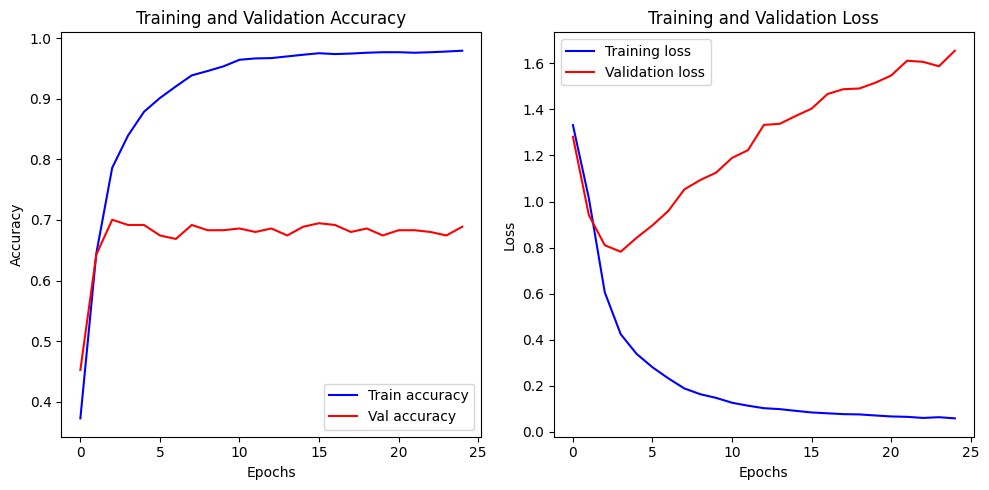

In [ ]:
epochs = training_log['epoch']
train_acc = training_log['accuracy']
val_acc = training_log['val_accuracy']
train_loss = training_log['loss']
val_loss = training_log['val_loss']

plt.figure(figsize=(10, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Train accuracy')
plt.plot(epochs, val_acc, 'r', label='Val accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

For the 'Training and Validation Accuracy', when the training accuracy keeps increasing while the validation accuracy stagnates or decreases, the model might be overfitting. As for the 'Training and Validation Loss', when the training loss continues to decrease, but the validation loss starts to rise, it indicates overfitting.

#### Exercise 7

We can use pre-trained word embeddings (like Word2Vec) and average or concatenate them to form sentence representations. Then, these representations can be fed into a classification model (such as a neural network) to do the training. Or we can use Transformer Model like BERT, using attention mechanisms to capture contextual information from word sequences.

#### Exercise 8

In [ ]:
# Download model
model_path = "/content/drive/MyDrive/DM2023-Lab2-Master/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [ ]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 14 # one is for word itself
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

target_words = angry_words + happy_words + sad_words + fear_words

cn = topn + 1
color = ['r'] * cn + ['y'] * cn + ['b'] * cn + ['g'] * cn

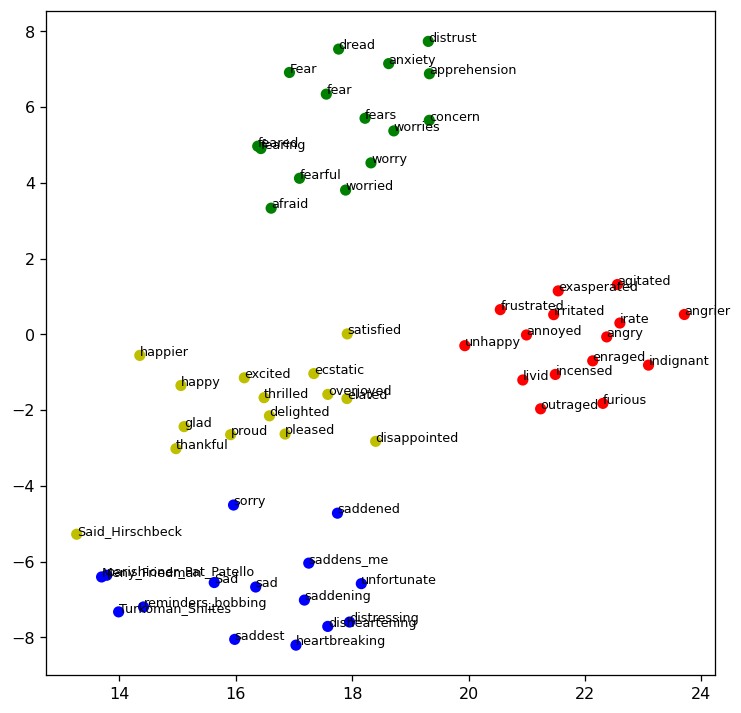

In [ ]:
%matplotlib inline
# w2v model
model = w2v_google_model

# Prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# Train
X_tsne = tsne.fit_transform(X_train)

# Plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8)
plt.show()

## Second

In [ ]:
# Data 讀取
data_identification = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/Homework-data/data_identification.csv")
emotion = pd.read_csv("/content/drive/MyDrive/DM2023-Lab2-Master/data/Homework-data/emotion.csv")
tweets_data = pd.read_json("/content/drive/MyDrive/DM2023-Lab2-Master/data/Homework-data/tweets_DM.json", lines=True)

In [ ]:
# 取出 train id 以及 test id
train_id = data_identification[data_identification['identification'] == 'train']['tweet_id'].tolist()
test_id = data_identification[data_identification['identification'] == 'test']['tweet_id'].tolist()

In [ ]:
# 處理資料
source = json_normalize(tweets_data['_source'])
tweets_data = pd.concat([tweets_data, source], axis=1)
tweets_data.drop(columns=['_source', '_type', '_index'], inplace=True)

In [ ]:
# 分出 train data 以及 test data
train_data = tweets_data[tweets_data['tweet.tweet_id'].isin(train_id)]
testdata = tweets_data[tweets_data['tweet.tweet_id'].isin(test_id)]

In [ ]:
# 合併 train data 以及 result
data = pd.merge(train_data, emotion, left_on='tweet.tweet_id', right_on='tweet_id')

In [ ]:
# 清理文本

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):
        # 去除標點符號和特殊字符
        text = re.sub(r'[^\w\s]', '', text)
        # 轉換為小寫
        text = text.lower()
        # 移除數字
        text = re.sub(r'\d+', '', text)
        # 移除停用詞
        tokens = word_tokenize(text)
        text = ' '.join([word for word in tokens if word not in stop_words])
        return text
    else:
        return ''

# training data
data['clean_text'] = data['tweet.text'].apply(clean_text)
# testing data
testdata['clean_text'] = testdata['tweet.text'].apply(clean_text)

In [ ]:
data

,_score,_crawldate,tweet.hashtags,tweet.tweet_id,tweet.text,tweet_id,emotion,clean_text
0,391,2015-05-23 11:42:47,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",0x376b20,anticipation,people post add snapchat must dehydrated cuz m...
1,433,2016-01-28 04:52:09,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",0x2d5350,sadness,brianklaas see trump dangerous freepress aroun...
2,376,2016-01-24 23:53:05,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,fear,issa stalking tasha lh
3,120,2015-06-11 04:44:05,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c,joy,riskshow thekevinallison thx best time tonight...
4,1021,2015-08-18 02:30:07,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,0x2c91a8,anticipation,still waiting supplies liscus lh
...,...,...,...,...,...,...,...,...
1455558,94,2016-12-26 02:44:07,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,0x321566,joy,im happy nowonder name show happy happysyfy sy...
1455559,627,2015-04-01 08:14:56,[],0x38959e,In every circumtance I'd like to be thankful t...,0x38959e,joy,every circumtance id like thankful almighty je...
1455560,274,2016-11-17 23:46:22,[blessyou],0x2cbca6,there's currently two girls walking around the...,0x2cbca6,joy,theres currently two girls walking around libr...
1455561,840,2016-09-02 14:25:06,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",0x24faed,joy,ah corporate life date lh using relative anach...


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data['clean_text'], data['emotion'], test_size=0.2, random_state=42)

In [ ]:
# BERT
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# 初始化 BERT tokenizer 和模型
model_name = 'bert-base-uncased'  # 選擇模型
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=8)

# 編碼文本數據
max_length = 64  # 最大序列長度
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=max_length, return_tensors='tf')
train_encodings = {key: tf.constant(value) for key, value in train_encodings.items()}

label_encoder = LabelEncoder()
train_encoded_labels = label_encoder.fit_transform(y_train)
train_labels = pd.Series(train_encoded_labels)

# 編譯模型
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# 訓練模型
model.fit(train_encodings, train_labels, epochs=2, batch_size=32)

In [ ]:
X_sub = testdata['clean_text']
# 做與訓練資料相同的編碼
test_encodings = tokenizer(list(X_sub), truncation=True, padding=True, max_length=max_length, return_tensors='tf')
test_encodings = {key: tf.constant(value) for key, value in test_encodings.items()}

# 進行預測
predictions = model.predict(test_encodings)

# 如果是分類問題，可以透過 argmax 取得預測的類別
predicted_classes = tf.argmax(predictions.logits, axis=1)

# 透過 LabelEncoder 將預測的數字類別轉換回原本的標籤
predicted_labels = label_encoder.inverse_transform(predicted_classes.numpy())

In [ ]:
# 建立 submission.csv
tweet_ids = testdata['tweet.tweet_id']
new_df = pd.DataFrame({'id': tweet_ids, 'emotion': predicted_labels})
new_df.to_csv('submission.csv', index=False)

In [ ]:
new_df